# 1. Project description

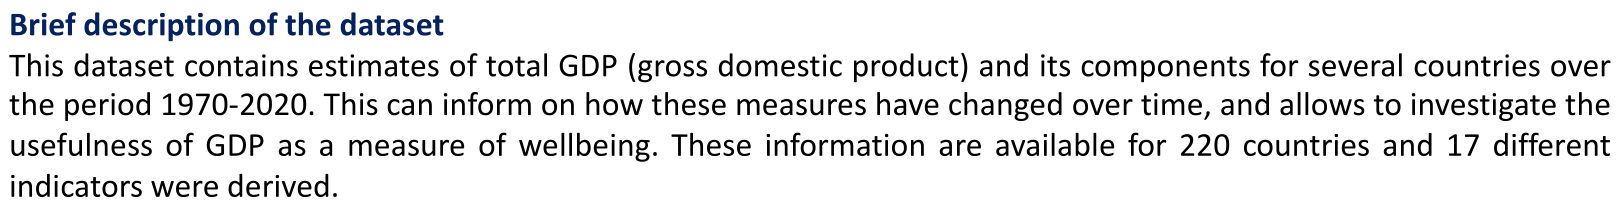

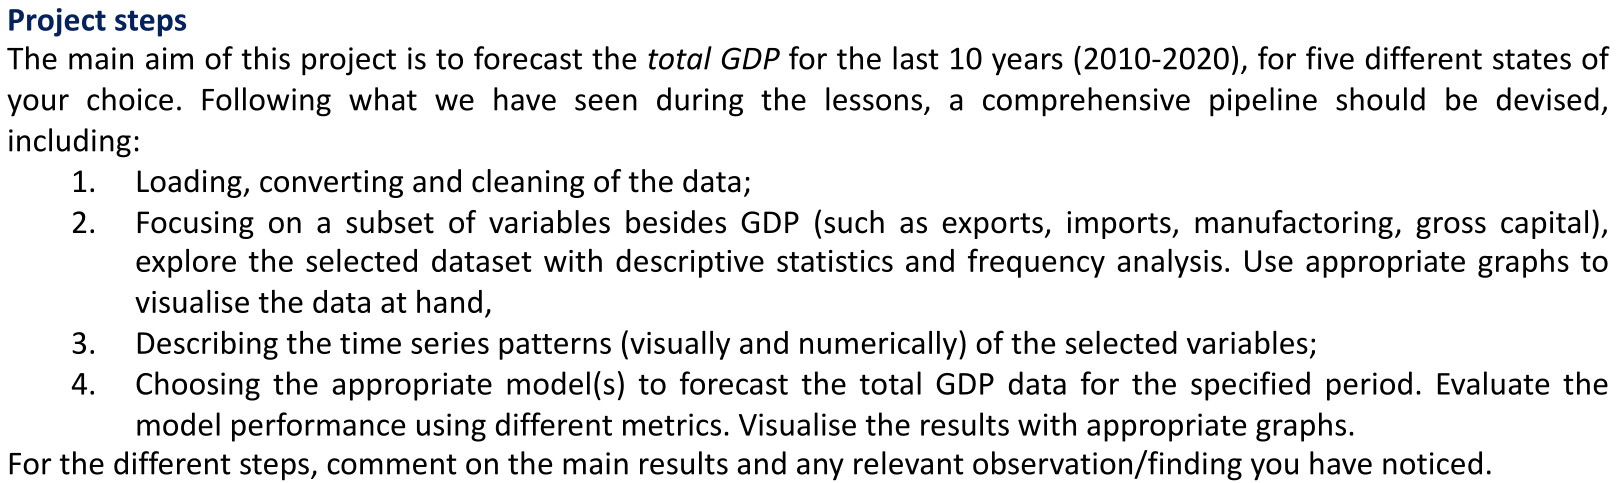

# 2. Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from numpy.fft import fft, ifft
from scipy import signal
import functions as f
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

# Set default display parameters
#plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['figure.dpi'] = 140
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#7180AC', '#6A605C', 'b', 'y'])
#plt.rcParams['lines.linewidth'] = 2.5
#plt.rcParams['axes.facecolor'] = 'black'

# 3. Create dataframes

In [2]:
df = pd.read_excel('GDPconstant-USD-countries.ods', index_col = 'CountryID', engine = 'odf')

In [3]:
df.head(3)

,Country,IndicatorName,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryID,,,,,,,,,,,,,,,,,,,,,
4,Afghanistan,Final consumption expenditure,3.068715e+09,2.957075e+09,2.886788e+09,3.100416e+09,3.328662e+09,3.514642e+09,3.587322e+09,3.825474e+09,...,1.153494e+10,1.537617e+10,1.849492e+10,1.856572e+10,1.912682e+10,1.930930e+10,1.813094e+10,2.154508e+10,2.494428e+10,2.210259e+10
4,Afghanistan,Household consumption expenditure (including N...,2.734161e+09,2.614420e+09,2.529175e+09,2.724908e+09,2.941860e+09,3.012107e+09,3.032225e+09,3.230522e+09,...,8.263218e+09,1.170813e+10,1.463690e+10,1.460849e+10,1.497766e+10,1.494902e+10,1.404900e+10,1.767663e+10,1.998886e+10,1.835413e+10
4,Afghanistan,General government final consumption expenditure,3.288787e+08,3.375334e+08,3.530078e+08,3.704164e+08,3.810549e+08,4.980797e+08,5.512724e+08,5.909253e+08,...,3.284910e+09,3.673733e+09,3.855382e+09,3.956030e+09,4.149161e+09,4.363228e+09,4.084496e+09,3.854648e+09,4.947607e+09,3.730520e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3686 entries, 4 to 716
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        3686 non-null   object 
 1   IndicatorName  3686 non-null   object 
 2   1970           3112 non-null   float64
 3   1971           3112 non-null   float64
 4   1972           3113 non-null   float64
 5   1973           3112 non-null   float64
 6   1974           3112 non-null   float64
 7   1975           3112 non-null   float64
 8   1976           3112 non-null   float64
 9   1977           3112 non-null   float64
 10  1978           3112 non-null   float64
 11  1979           3114 non-null   float64
 12  1980           3117 non-null   float64
 13  1981           3117 non-null   float64
 14  1982           3117 non-null   float64
 15  1983           3117 non-null   float64
 16  1984           3117 non-null   float64
 17  1985           3118 non-null   float64
 18  1986          

Target countries = ITALY, JAPAN, UAE, CANADA, SOUTH AFRICA

Target variables = Import, Export, Manufacturing, Gross Capital

In [5]:
df_italy = df[df['Country'] == 'Italy']
df_italy = f.create_df(df_italy)
df_japan = df[df['Country'] == 'Japan']
df_japan = f.create_df(df_japan)
df_uae = df[df['Country'] == 'United Arab Emirates']
df_uae = f.create_df(df_uae)
df_canada = df[df['Country'] == 'Canada']
df_canada = f.create_df(df_canada)
df_safrica = df[df['Country'] == 'South Africa']
df_safrica = f.create_df(df_safrica)

df_list = [df_italy, df_japan, df_uae, df_canada, df_safrica]
nation_list = ['Italy', 'Japan', 'UAE', 'Canada', 'South Africa']

In [6]:
i = 0
for df in df_list:
    print(nation_list[i])
    print(df.info())
    print('----------------------------------------------')
    i += 1

Italy
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1970 to 2020
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB
None
----------------------------------------------
Japan
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1970 to 2020
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB
None
---------------------------------------------

Change from object type to float type

In [7]:
df_italy = df_italy.astype(float)
df_japan = df_japan.astype(float)
df_uae = df_uae.astype(float)
df_canada = df_canada.astype(float)
df_safrica = df_safrica.astype(float)

# 4. Descriptive statistics

In [8]:
for df in df_list:
    display(df.describe())

,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,8.713649e+10,9.790250e+10,1.117828e+11,1.995984e+11,8.466100e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,6.469973e+10,1.210685e+11,2.900913e+11,5.298621e+11,1.460289e+12
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,1.703888e+10,7.297332e+09,2.712870e+08,7.017399e+09,2.873000e+10
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,8.092115e+10,6.375635e+10,6.596572e+10,7.610953e+10,4.581051e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,3.301551e+10,2.333012e+10,1.327414e+10,2.008736e+10,1.044714e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Check for the variable with the highest correlation with GDP

In [9]:
corr_ita = df_italy.corr()
corr_jap = df_japan.corr()
corr_uae = df_uae.corr()
corr_canada = df_canada.corr()
corr_safrica = df_safrica.corr()

corr_list = [corr_ita, corr_jap, corr_uae, corr_canada, corr_safrica]

max_list = []
f.highest_corr_variable(corr_list, max_list)

,Highest correlation variable
Italy,Manufacturing
Japan,Manufacturing
UAE,Manufacturing
Canada,Imports
South Africa,Manufacturing


# 5. Descriptive plots

## Line-plot 

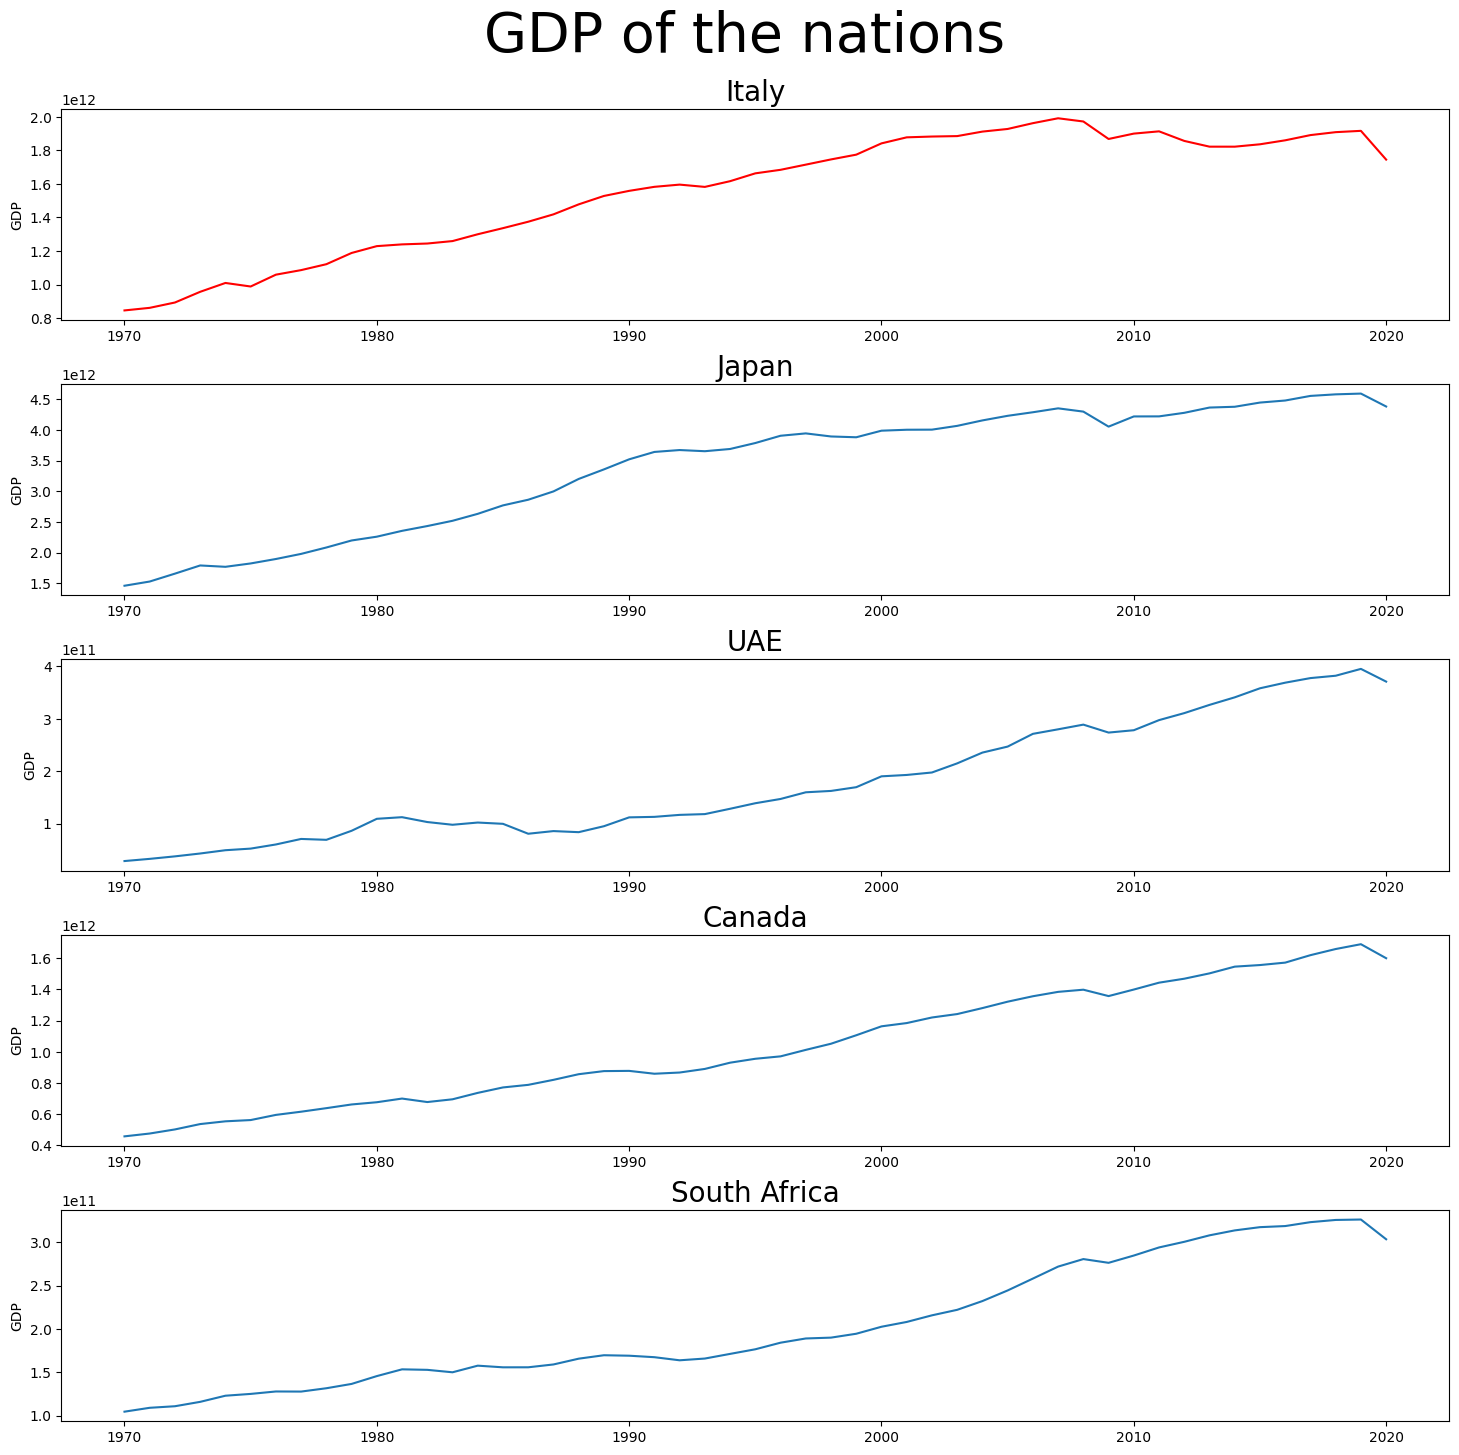

In [10]:
fig, ax = plt.subplots(5, 1, figsize = (15, 15))
plt.suptitle('GDP of the nations', fontsize = 40)
plt.tight_layout(pad = 2.5)

sns.lineplot(df_italy['GDP'], ax = ax[0], c = 'red')
sns.lineplot(df_japan['GDP'], ax = ax[1])
sns.lineplot(df_uae['GDP'], ax = ax[2])
sns.lineplot(df_canada['GDP'], ax = ax[3])
sns.lineplot(df_safrica['GDP'], ax = ax[4])

ax[0].set_title('Italy', fontsize = 20)
ax[1].set_title('Japan', fontsize = 20)
ax[2].set_title('UAE', fontsize = 20)
ax[3].set_title('Canada', fontsize = 20)
ax[4].set_title('South Africa', fontsize = 20)

plt.show()

GDP has similar trend for all the states

## Correlation heatmap

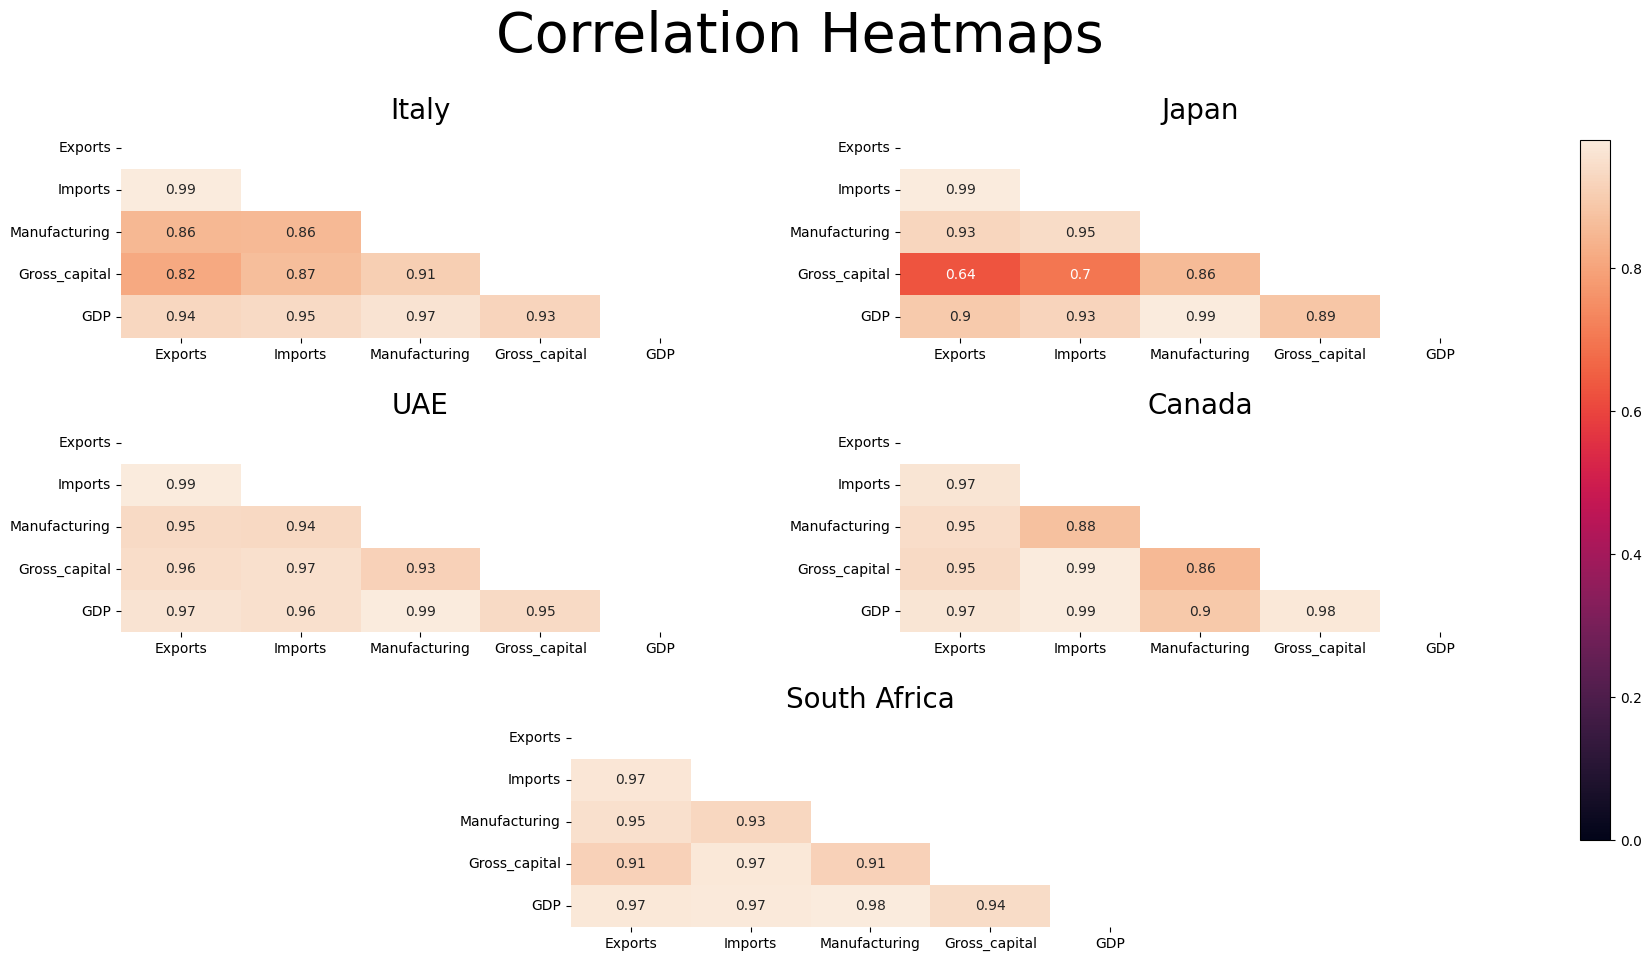

In [11]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Correlation Heatmaps', fontsize = 40)
plt.tight_layout(pad = 2.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

matrix = np.triu(corr_ita)
sns.heatmap(corr_ita,annot = True, ax = ax[0][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_jap)
sns.heatmap(corr_jap, annot = True, ax = ax[0][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_uae)
sns.heatmap(corr_uae, annot = True, ax = ax[1][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_canada)
sns.heatmap(corr_canada, annot = True, ax = ax[1][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_safrica)
sns.heatmap(corr_safrica, annot = True, ax = ax[2][0], vmin = 0, cbar = False, mask = matrix)
fig.delaxes(ax[2][1])

ax[0][0].set_title('Italy', fontsize = 20)
ax[0][1].set_title('Japan', fontsize = 20)
ax[1][0].set_title('UAE', fontsize = 20)
ax[1][1].set_title('Canada', fontsize = 20)
ax[2][0].set_title('South Africa', fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.3, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(ax[2][0].collections[0], cax = cbar_ax)

plt.show()

Correlation is high between all the variables in all the states

## Scatterplot 
Visualize the lowest correlation between 2 variables in all the states to prove the previous statement

Tuple of variables for every nation with lowest correlation:


,0,1
Italy,Exports,Gross_capital
Japan,Exports,Gross_capital
UAE,Manufacturing,Gross_capital
Canada,Manufacturing,Gross_capital
South Africa,Manufacturing,Gross_capital


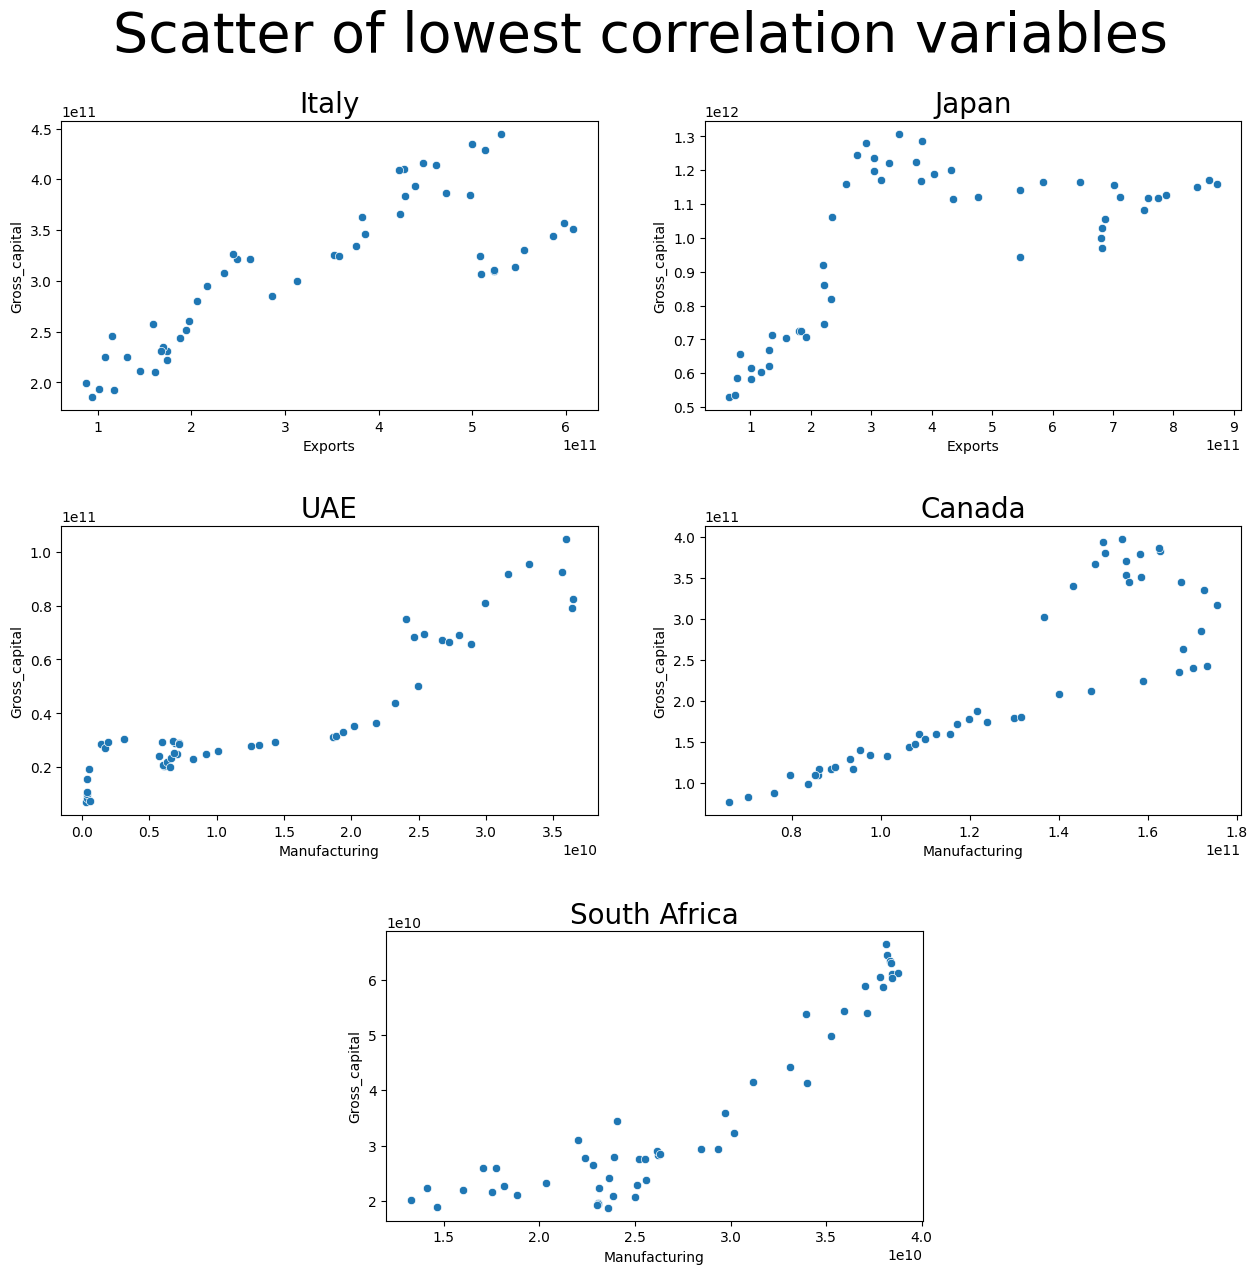

In [12]:
low_corr_list = []

fig, ax = plt.subplots(3, 2, figsize = (13, 13))
plt.suptitle('Scatter of lowest correlation variables', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

idx = f.lowest_corr_variable(corr_ita)
low_corr_list.append(idx)
sns.scatterplot(x = df_italy[idx[0]], y = df_italy[idx[1]], ax = ax[0][0])
idx = f.lowest_corr_variable(corr_jap)
low_corr_list.append(idx)
sns.scatterplot(x = df_japan[idx[0]], y = df_japan[idx[1]], ax = ax[0][1])
idx = f.lowest_corr_variable(corr_uae)
low_corr_list.append(idx)
sns.scatterplot(x = df_uae[idx[0]], y = df_uae[idx[1]], ax = ax[1][0])
idx = f.lowest_corr_variable(corr_canada)
low_corr_list.append(idx)
sns.scatterplot(x = df_canada[idx[0]], y = df_canada[idx[1]], ax = ax[1][1])
idx = f.lowest_corr_variable(corr_safrica)
low_corr_list.append(idx)
sns.scatterplot(x = df_safrica[idx[0]], y = df_safrica[idx[1]], ax = ax[2][0])
fig.delaxes(ax[2][1])

ax[0][0].set_title('Italy', fontsize = 20)
ax[0][1].set_title('Japan', fontsize = 20)
ax[1][0].set_title('UAE', fontsize = 20)
ax[1][1].set_title('Canada', fontsize = 20)
ax[2][0].set_title('South Africa', fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

print('Tuple of variables for every nation with lowest correlation:')
display(pd.DataFrame(low_corr_list, index = ['Italy', 'Japan', 'UAE', 'Canada', 'South Africa']))

plt.show()

## Lag-plot

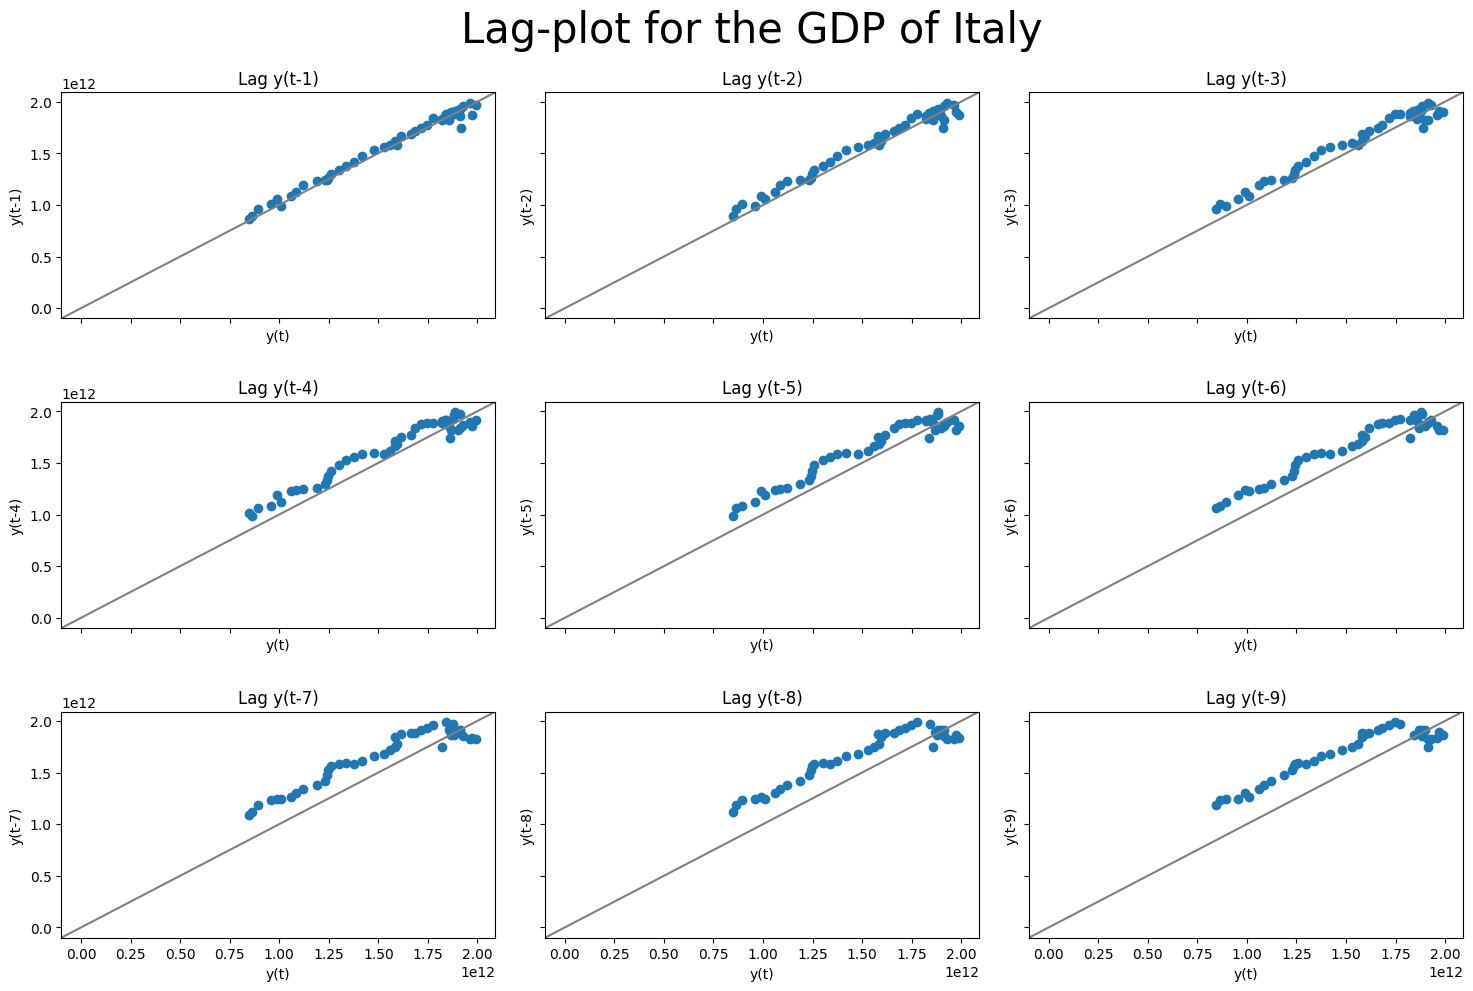

In [13]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle('Lag-plot for the GDP of Italy', fontsize = 30)
plt.tight_layout(pad = 2, h_pad = 5)

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(df_italy['GDP'], lag = i+1, ax = ax)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t-'+str(i+1)+')')
    ax.set_title(f'Lag y(t-{str(i+1)})')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



## Autocorrelation of GDP

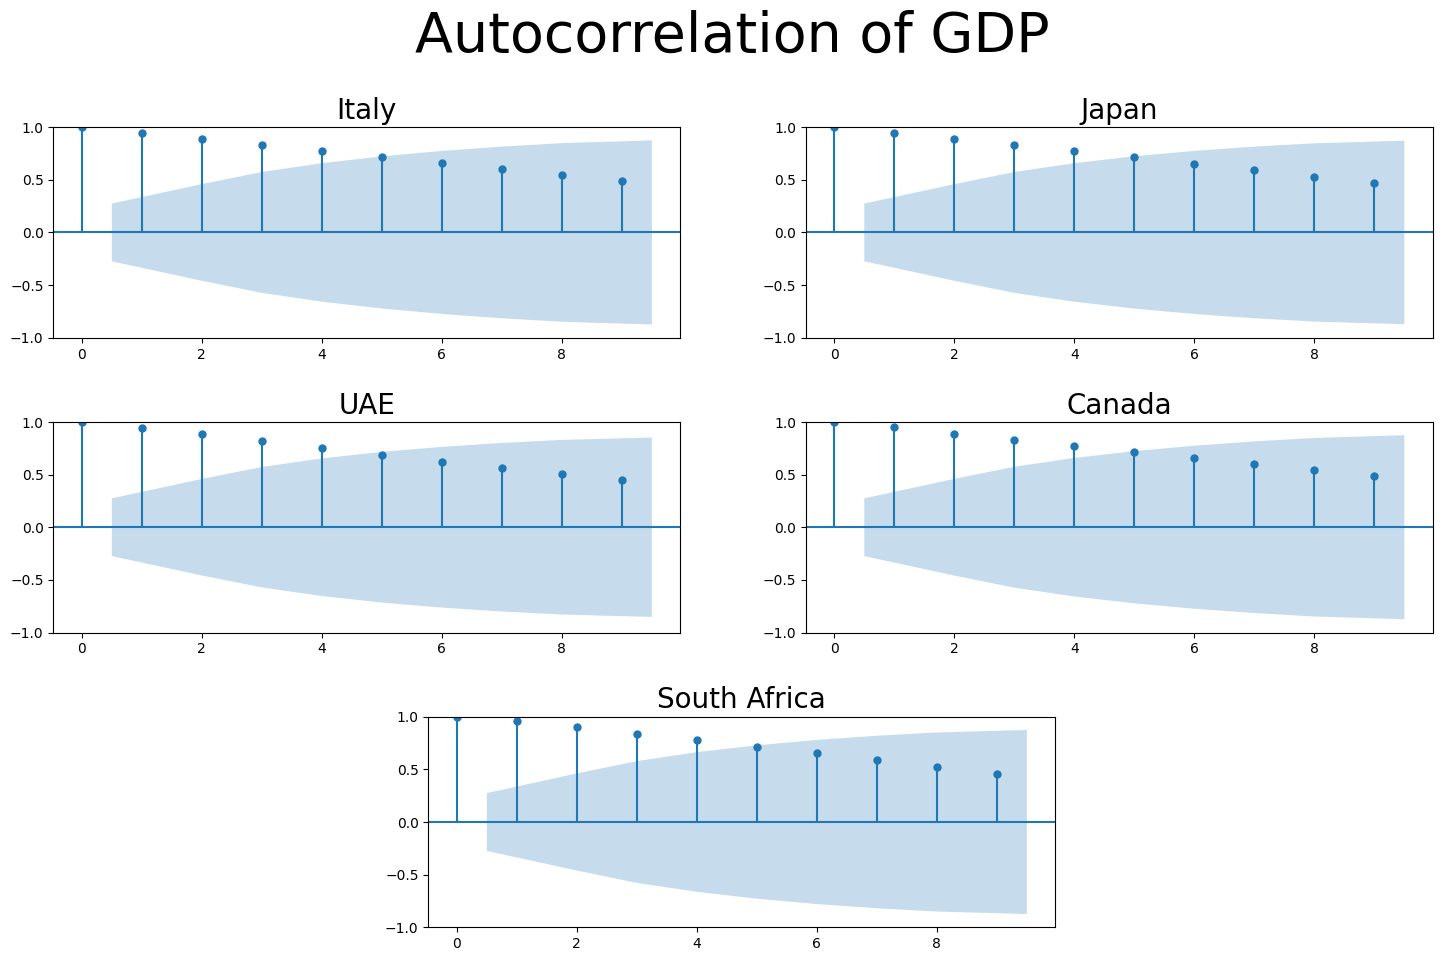

In [14]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Autocorrelation of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

plot_acf(df_italy['GDP'], lags = 9, ax = ax[0][0])
plot_acf(df_japan['GDP'], lags = 9, ax = ax[0][1])
plot_acf(df_uae['GDP'], lags = 9, ax = ax[1][0])
plot_acf(df_canada['GDP'], lags = 9, ax = ax[1][1])
plot_acf(df_safrica['GDP'], lags = 9, ax = ax[2][0])

fig.delaxes(ax[2][1])

ax[0][0].set_title('Italy', fontsize = 20)
ax[0][1].set_title('Japan', fontsize = 20)
ax[1][0].set_title('UAE', fontsize = 20)
ax[1][1].set_title('Canada', fontsize = 20)
ax[2][0].set_title('South Africa', fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

plt.show()

# 6. Split data in train and test 

In [15]:
df_train_test = {}

for idx, df in enumerate(df_list):
    df_train_test[nation_list[idx]] = f.train_test_split(df)

# 7. Frequency analysis

## Fast Fourier Transform

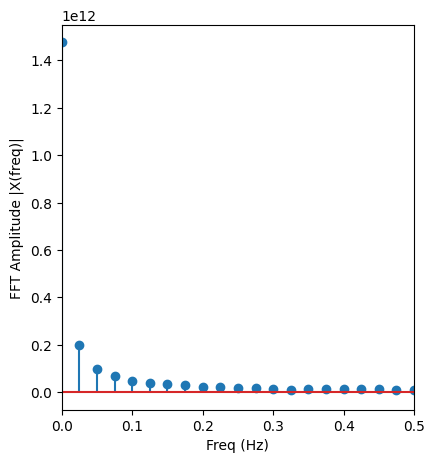

In [16]:
X = fft(df_train_test['Italy'][0]['GDP']) # compute the 1D DFT
N = len(X)
Fs = 1
freq_step = Fs/N;
freq_vec = np.arange(0, Fs, freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N)
plt.xlim(0, 0.5)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## Power-spectral density

,Frequency,Density,Period
0,0.075,3.606953e+23,13.333333
1,0.125,5.464034e+22,8.000000
2,0.175,2.234522e+22,5.714286
3,0.225,5.324820e+21,4.444444
4,0.275,2.048618e+21,3.636364
5,0.325,4.625507e+20,3.076923
6,0.375,2.120274e+21,2.666667
7,0.425,1.604150e+21,2.352941
8,0.475,1.170087e+21,2.105263


Text(0, 0.5, 'Power')

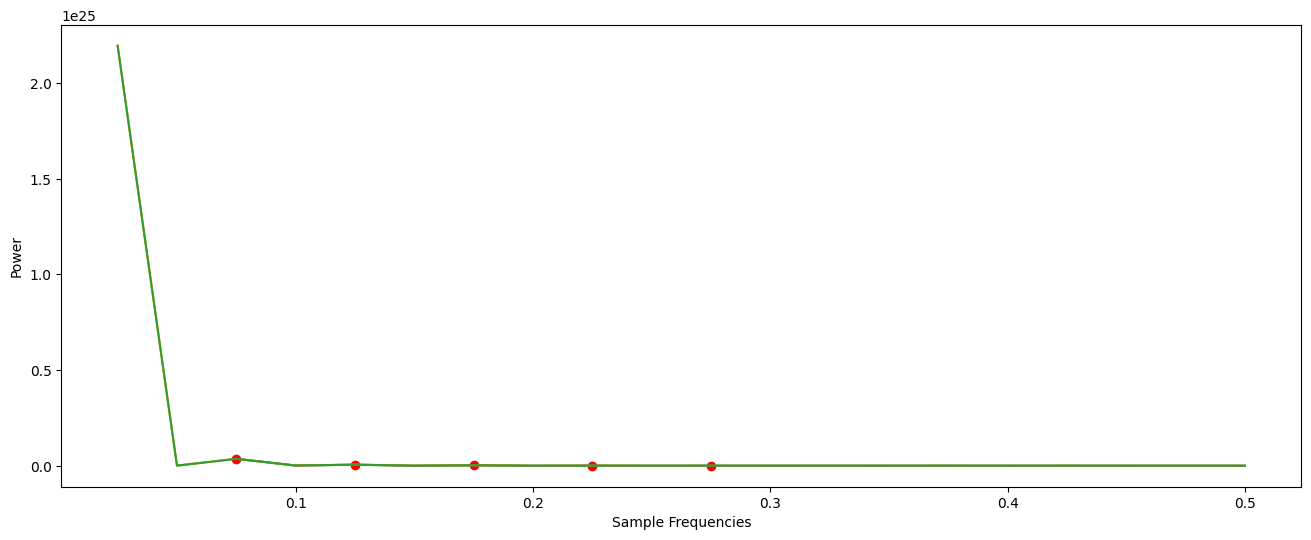

In [17]:
f_per, Pxx_per = signal.periodogram(df_train_test['Italy'][0]['GDP'],Fs,detrend=None,window='triang',return_onesided=True,scaling='density')
f_per = f_per[1:]
Pxx_per = Pxx_per[1:]

#Find the peaks of the periodogram.
peaks = signal.find_peaks(Pxx_per[f_per >= 0], prominence = 100000)[0]
peak_freq = f_per[peaks]
peak_dens = Pxx_per[peaks]

#Plot of the analysis transformation and of its peaks. Only the first five are interestings
fig = plt.figure(figsize=(16,6))

plt.plot(peak_freq[:5], peak_dens[:5], 'ro');
plt.plot(f_per[2:],Pxx_per[2:])

#Retrieving of the values
data = {'Frequency': peak_freq, 'Density': peak_dens, 'Period': 1/peak_freq}
period_df = pd.DataFrame(data)

display(period_df.head(10))
sns.lineplot(x=f_per,y=Pxx_per)
plt.plot(f_per, Pxx_per)
plt.xlabel('Sample Frequencies')
plt.ylabel('Power')

# 8. Stationarity check

## 8.1 Visual stationarity

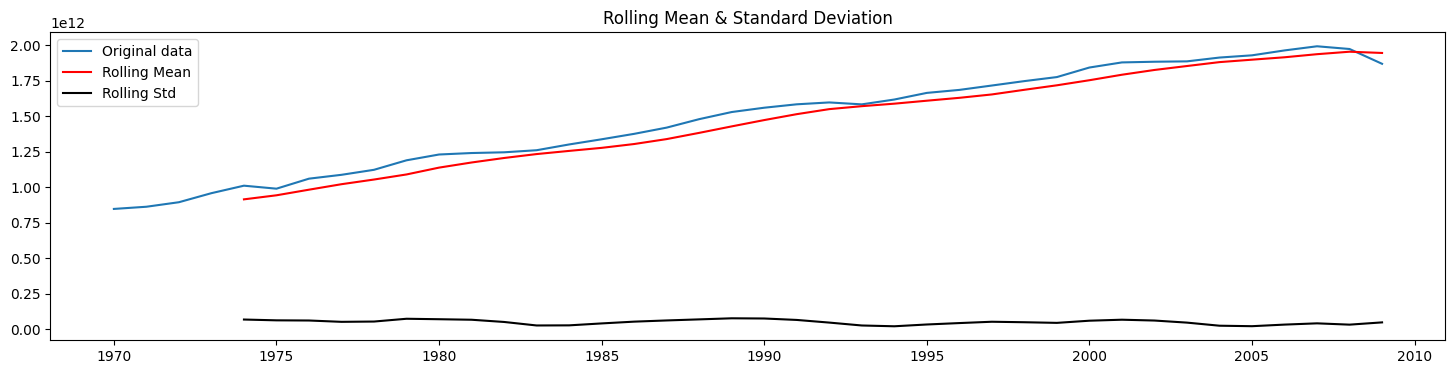

In [18]:
rolling_mean = df_train_test['Italy'][0]['GDP'].rolling(5).mean()
rolling_std = df_train_test['Italy'][0]['GDP'].rolling(5).std()
plt.figure(figsize = (18,4))
plt.plot(df_train_test['Italy'][0]['GDP'], label = 'Original data')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation');

## 8.2 Statistics stationarity

In [19]:
for idx, df in enumerate(df_list):
    print(f'ADF on {nation_list[idx]} GDP')
    f.adfuller_test(df_train_test[nation_list[idx]][0]['GDP']) 
    print('')  
    print(f'KPSS on {nation_list[idx]} GDP')
    f.kpss_test(df_train_test[nation_list[idx]][0]['GDP'])
    print('-----------------------')
    print('')

ADF on Italy GDP
ADF Statistic: -2.213743115604189
p-value:  0.20129536359943373
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
We cannot reject the null hypothesis (H0) --> data is non-stationary

KPSS on Italy GDP
KPSS Statistic: 0.8944970413398121
p-value:  0.01
We can reject the null hypothesis (H0) --> unit root, data is not stationary
-----------------------

ADF on Japan GDP
ADF Statistic: -1.775774894711412
p-value:  0.39255336661800866
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
We cannot reject the null hypothesis (H0) --> data is non-stationary

KPSS on Japan GDP
KPSS Statistic: 0.8769540425033426
p-value:  0.01
We can reject the null hypothesis (H0) --> unit root, data is not stationary
-----------------------

ADF on UAE GDP
ADF Statistic: 0.802299303158466
p-value:  0.9916731925719209
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608
We cannot reject the null hypothesis (H0) --> data is non-stationary

KPSS on UAE GDP
KPSS Statistic: 0.833602890768047

In [20]:
df_train_test_log = {}

'''def log_transform(df_train_test):
    for nation in df_train_test:
        df_train_test_log[nation] = (np.log(df_train_test[nation][0]), np.log(df_train_test[nation][1]))
    return df_train_test_log'''

df_train_test_log = f.log_transform(df_train_test)

In [21]:
df_train_test_log_dif = {}

'''def difference(df_train_test, difference):
    for nation in df_train_test:
        df_train_test_log_dif[nation] = (df_train_test[nation][0].diff(difference).dropna(), df_train_test[nation][1].diff().dropna())
    return df_train_test_log_dif'''

df_train_test_log_dif = f.difference(df_train_test_log, 13)

In [22]:
for idx, df in enumerate(df_list):
    print(f'ADF on {nation_list[idx]} differenced GDP')
    f.adfuller_test(df_train_test_log_dif[nation_list[idx]][0]['GDP']) 
    print('')  
    print(f'KPSS on {nation_list[idx]} differenced GDP')
    f.kpss_test(df_train_test_log_dif[nation_list[idx]][0]['GDP'])
    print('-----------------------')
    print('')

ADF on Italy differenced GDP
ADF Statistic: -0.5351495807889278
p-value:  0.8849728699295738
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
We cannot reject the null hypothesis (H0) --> data is non-stationary

KPSS on Italy differenced GDP
KPSS Statistic: 0.776314404319868
p-value:  0.01
We can reject the null hypothesis (H0) --> unit root, data is not stationary
-----------------------

ADF on Japan differenced GDP
ADF Statistic: 0.8082586685584213
p-value:  0.9917683155567988
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636
We cannot reject the null hypothesis (H0) --> data is non-stationary

KPSS on Japan differenced GDP
KPSS Statistic: 0.7284860896212411
p-value:  0.01095581003443263
We can reject the null hypothesis (H0) --> unit root, data is not stationary
-----------------------

ADF on UAE differenced GDP
ADF Statistic: -2.3524202505859706
p-value:  0.155617991286713
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656
We cannot reject the null hypothesis (H0) -->

In [23]:
df_train_test_log_2dif = f.difference(df_train_test_log_dif, 1)

for idx, df in enumerate(df_list):
    print(f'ADF on {nation_list[idx]} differenced GDP')
    f.adfuller_test(df_train_test_log_2dif[nation_list[idx]][0]['GDP']) 
    print('')  
    print(f'KPSS on {nation_list[idx]} differenced GDP')
    f.kpss_test(df_train_test_log_2dif[nation_list[idx]][0]['GDP'])
    print('-----------------------')
    print('')

ADF on Italy differenced GDP
ADF Statistic: -3.4345654584466763
p-value:  0.00983548243669488
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
We can reject the null hypothesis (H0) --> data is stationary

KPSS on Italy differenced GDP
KPSS Statistic: 0.15428323833055652
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
-----------------------

ADF on Japan differenced GDP
ADF Statistic: -2.85455626341254
p-value:  0.05089344262382578
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636
We cannot reject the null hypothesis (H0) --> data is non-stationary

KPSS on Japan differenced GDP
KPSS Statistic: 0.24874113685332588
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
-----------------------

ADF on UAE differenced GDP
ADF Statistic: -2.9095683179544274
p-value:  0.04424659263438518
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
We can reject the null hypothesis (H0) --> data is stationary

KPSS on UAE 

To achieve stationarity:
1. log transform
2. seasonal differencing
3. first order differencing

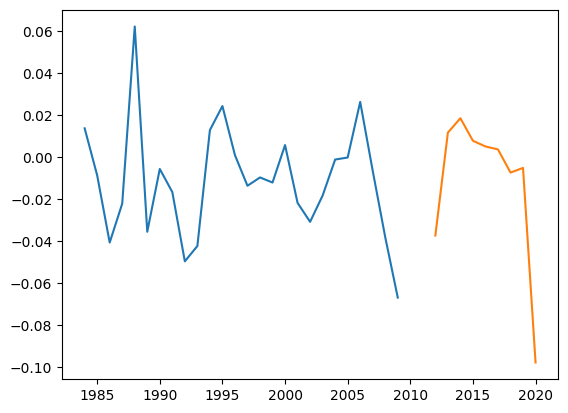

In [24]:
plt.plot(df_train_test_log_2dif['Italy'][0]['GDP'])
plt.plot(df_train_test_log_2dif['Italy'][1]['GDP'])